# Шаг1: Импорт библиотек

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from IPython.display import display

# Шаг2: Чтение файла и импорт данных

In [40]:
data = pd.read_csv('/workspaces/spbu-python-course/project/titanik#9/titanic.csv')
display("Данные после загрузки:")
display(data.head())
display(data.info())

'Данные после загрузки:'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

# Шаг3: DataCleaning

In [41]:
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Cabin'] = data['Cabin'].fillna('Unknown')

# Удаление ненужных столбцов
display("Список столбцов перед удалением:")
display(data.columns)

data = data.drop(['Name', 'Ticket'], axis=1)

# Проверка наличия необходимых столбцов перед преобразованием
display("Список столбцов перед преобразованием категориальных переменных:")
display(data.columns)

# Преобразовываем категориальные переменные в числовые
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

# Удалим или преобразуем столбец 'Cabin', так как он не числовой и содержит строки
data = data.drop('Cabin', axis=1)

# Проверяем наличие пропусков после обработки
display("Количество пропусков в каждом столбце после обработки:")
display(data.isnull().sum())

'Список столбцов перед удалением:'

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

'Список столбцов перед преобразованием категориальных переменных:'

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

'Количество пропусков в каждом столбце после обработки:'

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
dtype: int64

# Шаг4: EDA. График выживших. Гистограмма возраста пассажиров. График оотношение выживаемости по полу

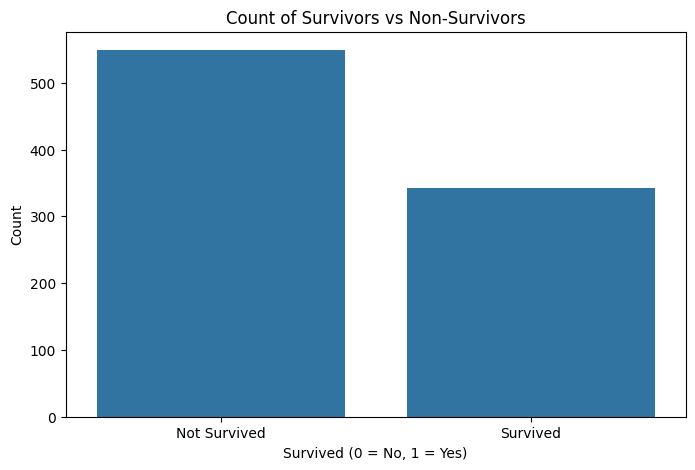

In [42]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=data)
plt.title('Count of Survivors vs Non-Survivors')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
plt.show()

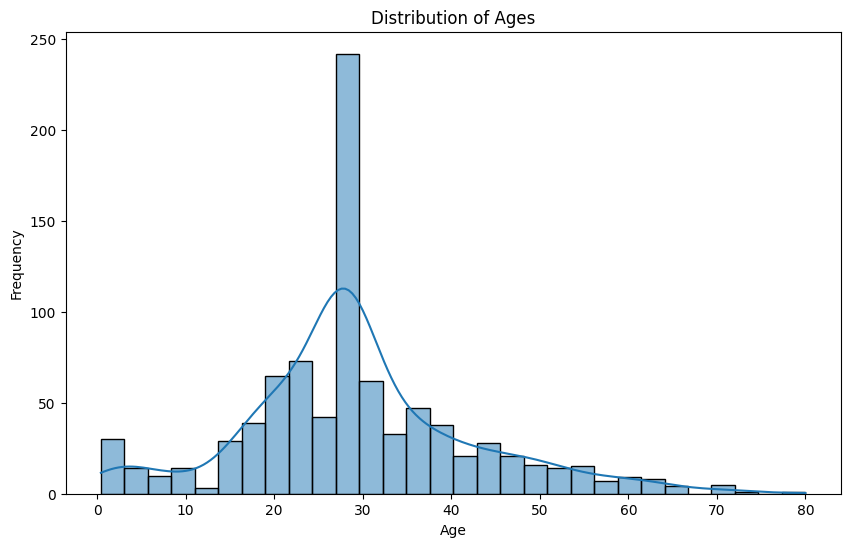

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

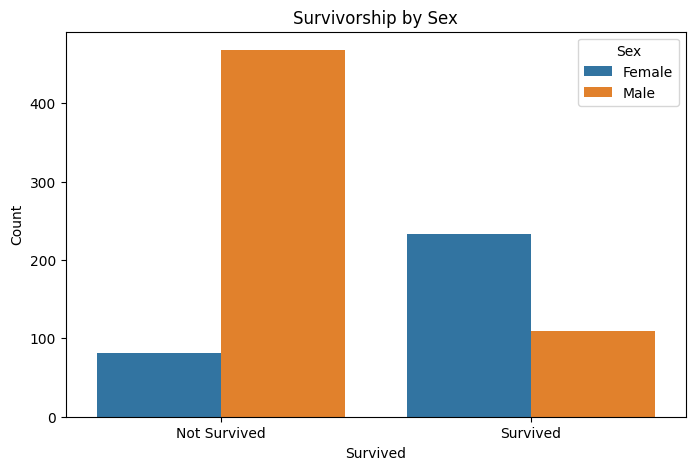

In [44]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', hue='Sex_male', data=data)  # Используем дамми-переменную Sex_male
plt.title('Survivorship by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Survived', 'Survived'])
plt.legend(title='Sex', labels=['Female', 'Male'])  # Добавляем легенду
plt.show()

## Выводы по графикам 

1: Количество выживших и невыживших
На первом графике показано распределение пассажиров по статусу выживания. Мы видим, что большинство пассажиров не выжили. В то время как количество выживших пассажиров составляет около 38%, количество невыживших значительно выше.

2: Распределение возрастов
Второй график демонстрирует распределение возрастов пассажиров на Титанике. Мы видим, что пик распределения возрастов находится в возрастной группе около 20-30 лет. 

3: Выживаемость по полу
Третий график представляет собой сравнительный анализ выживаемости среди мужчин и женщин. Мы видим, что женщины выживали реже, чем мужчины. 

# Шаг5: Преобразование категориальных признаков в числовые. Обучение модели

In [45]:
x = data.drop('Survived', axis=1)
y = data['Survived']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Масштабирование данных
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)  # Масштабируем обучающую выборку
x_test_scaled = scaler.transform(x_test)

In [53]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_scaled, y_train)
y_pred_rf = rf_model.predict(x_test_scaled)

# Вычисляем метрики
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
display(f'RandomForest - Precision: {precision_rf:.2f}, Recall: {recall_rf:.2f}, Accuracy: {accuracy_rf:.2f}')

'RandomForest - Precision: 0.82, Recall: 0.74, Accuracy: 0.83'

Обучение DecisionTreeClassifier

In [54]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train_scaled, y_train)
y_pred_dt = dt_model.predict(x_test_scaled)

# Вычисляем метрики
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
display(f'DecisionTree - Precision: {precision_dt:.2f}, Recall: {recall_dt:.2f}, F1 Score: {f1_dt:.2f}, Accuracy: {accuracy_dt:.2f}')

'DecisionTree - Precision: 0.66, Recall: 0.68, F1 Score: 0.67, Accuracy: 0.72'

Обучение LogisticRegression

In [58]:
log_model = LogisticRegression(max_iter=1000, solver='liblinear')
log_model.fit(x_train_scaled, y_train)
y_pred_log = log_model.predict(x_test_scaled)

# Вычисляем метрики
precision_log = precision_score(y_test, y_pred_log, pos_label=0)  # Для погибших
recall_log = recall_score(y_test, y_pred_log, pos_label=0)  # Для погибших
display(f'LogisticRegression - Precision (Dead): {precision_log:.2f}, Recall (Dead): {recall_log:.2f}')

'LogisticRegression - Precision (Dead): 0.82, Recall (Dead): 0.85'

In [59]:
rmse_value = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
display(f'Root Mean Squared Error for Age: {rmse_value:.2f}') 

'Root Mean Squared Error for Age: 11.59'

In [60]:
results = pd.DataFrame({
    'Model': ['DecisionTreeClassifier', 'RandomFormyestClassifier', 'LogisticRegression', 'LinearRegression'],
    'Precision (Survived)': [precision_dt, precision_rf, None, None],
    'Recall (Survived)': [recall_dt, recall_rf, None, None],
    'F1 Score (Survived)': [f1_dt, None, None, None],
    'Accuracy': [accuracy_dt, accuracy_rf, None, None],
    'Precision (Dead)': [None, None, precision_log, None],
    'Recall (Dead)': [None, None, recall_log, None],
    'RMSE (Age)': [None, None, None, rmse_value]
})

# Объединение с "вашими результатами"
my_results = pd.DataFrame({
    'Model': ['Your Results'],
    'Precision (Survived)': [0.79],
    'Recall (Survived)': [0.72],
    'F1 Score (Survived)': [0.75],
    'Accuracy': [0.80],
    'Precision (Dead)': [0.81],
    'Recall (Dead)': [0.88],
    'RMSE (Age)': [10.7],
})

In [61]:
results = pd.concat([results, my_results], ignore_index=True)
display(results)

,Model,Precision (Survived),Recall (Survived),F1 Score (Survived),Accuracy,Precision (Dead),Recall (Dead),RMSE (Age)
0,DecisionTreeClassifier,0.657895,0.675676,0.666667,0.720670,NaN,NaN,NaN
1,RandomFormyestClassifier,0.820896,0.743243,NaN,0.826816,NaN,NaN,NaN
2,LogisticRegression,NaN,NaN,NaN,NaN,0.824074,0.847619,NaN
3,LinearRegression,NaN,NaN,NaN,NaN,NaN,NaN,11.587327
4,Your Results,0.790000,0.720000,0.750000,0.800000,0.810000,0.880000,10.700000


# ВЫВОД